In [85]:
%matplotlib notebook

In [2]:
#imports 
import json
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pprint as pprint

In [3]:
# cleaned data file to be saved
cleanData = "../data/cleanData/jp_clean_data.csv"

visualizationData = "../data/vizData/jp_clean_data.csv"

# path csv file location
pathCleanData ="../datacleanData/"

In [4]:
#Pull clean data
#calling the csv cleanData folder
cleansed_data_df = pd.read_csv(cleanData)
cleansed_data_df.head()

,Job Posting ID,Job Title,Category,Company Name,City,State,Country,Lat,Lng,LatLng
0,1312805093,Physician: Family Physician Job Opening in Ups...,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1,1312805901,Physician: Urology Need in Western Ohio with L...,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
2,1328241931,Physician: Internal Medicine Physician Job in ...,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"
3,1334502463,Physician: A Locums Otolaryngologist Is Wanted...,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126"
4,1312805719,"Physician: Hospitalist needed in Hartford, CT ...",Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002"


In [5]:
#Lowercase all column names 
cleansed_data_df.columns = map(str.lower, cleansed_data_df.columns)
cleansed_data_df.head()

,job posting id,job title,category,company name,city,state,country,lat,lng,latlng
0,1312805093,Physician: Family Physician Job Opening in Ups...,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1,1312805901,Physician: Urology Need in Western Ohio with L...,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
2,1328241931,Physician: Internal Medicine Physician Job in ...,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"
3,1334502463,Physician: A Locums Otolaryngologist Is Wanted...,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126"
4,1312805719,"Physician: Hospitalist needed in Hartford, CT ...",Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002"


In [6]:
#Set job posting id as index
cleansed_data = cleansed_data_df.set_index('job posting id')
cleansed_data.head()

,job title,category,company name,city,state,country,lat,lng,latlng
job posting id,,,,,,,,,
1312805093,Physician: Family Physician Job Opening in Ups...,Healthcare & Nursing Jobs,CompHealth,Clayton,New York,United States,44.239491,-76.085776,"44.239490999999994,-76.085776"
1312805901,Physician: Urology Need in Western Ohio with L...,Healthcare & Nursing Jobs,CompHealth,Sunbury,Ohio,United States,40.305232,-82.824785,"40.305232000000004,-82.82478499999998"
1328241931,Physician: Internal Medicine Physician Job in ...,Healthcare & Nursing Jobs,CompHealth,Cheshire,Connecticut,United States,41.508367,-72.910620,"41.508367,-72.91062"
1334502463,Physician: A Locums Otolaryngologist Is Wanted...,Healthcare & Nursing Jobs,CompHealth,Marion,Illinois,United States,37.730605,-88.933126,"37.730605,-88.933126"
1312805719,"Physician: Hospitalist needed in Hartford, CT ...",Healthcare & Nursing Jobs,CompHealth,Cromwell,Connecticut,United States,41.601859,-72.657316,"41.60185900000001,-72.65731600000002"


In [7]:
category = cleansed_data['category']
category

job posting id
1312805093     Healthcare & Nursing Jobs
1312805901     Healthcare & Nursing Jobs
1328241931     Healthcare & Nursing Jobs
1334502463     Healthcare & Nursing Jobs
1312805719     Healthcare & Nursing Jobs
                         ...            
1338900671    Logistics & Warehouse Jobs
1320153715     Healthcare & Nursing Jobs
1338909279    Logistics & Warehouse Jobs
1312808260     Healthcare & Nursing Jobs
1338901433    Logistics & Warehouse Jobs
Name: category, Length: 953, dtype: object

In [8]:
category.unique()

array(['Healthcare & Nursing Jobs', 'Other/General Jobs',
       'Customer Services Jobs', 'Sales Jobs', 'Retail Jobs',
       'Logistics & Warehouse Jobs', 'Accounting & Finance Jobs'],
      dtype=object)

In [9]:
cat_count = category.count()

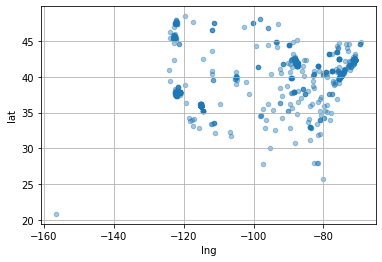

In [29]:
# function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
#                                    vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, 
#                                    plotnonfinite=False, data=None, **kwargs)>
cleansed_data.plot(kind="scatter", x="lng", y="lat", alpha=0.4)
plt.grid()
plt.show()

In [11]:
# Extract the data we're interested in
lat = cleansed_data['lat'].values
lon = cleansed_data['lng'].values
population = cat_count.values
area = cities['area_total_km2'].values

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

AttributeError: 'numpy.int32' object has no attribute 'values'

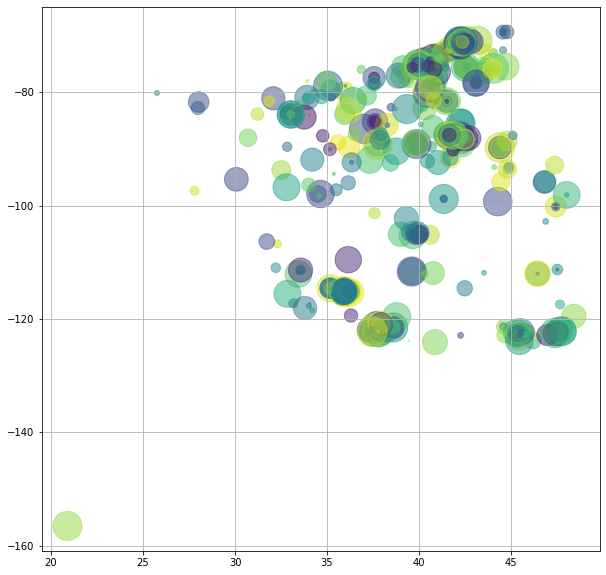

In [23]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 953
x = cleansed_data['lat']
y = cleansed_data['lng']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid()
plt.show()

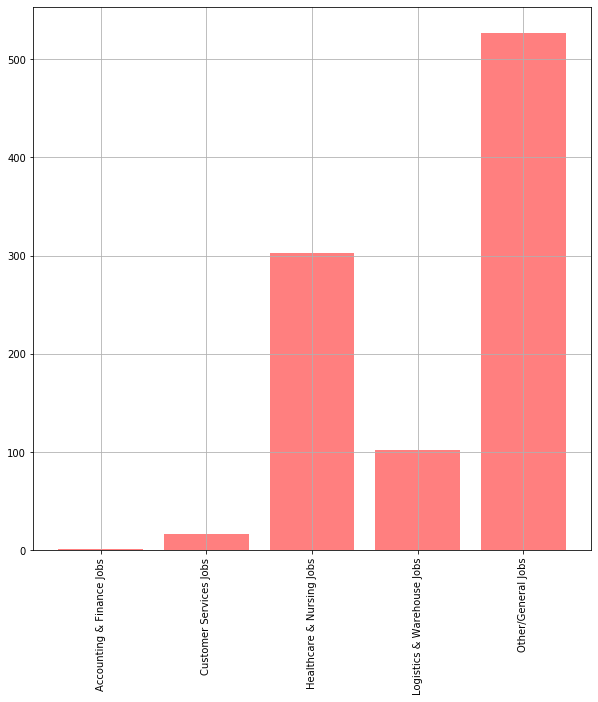

In [24]:
grouped = cleansed_data.groupby(['category']).count()
grouped = grouped.head().reset_index()

cat = cleansed_data['category']

x_axis = np.arange(len(grouped))

plt.figure(figsize=(10,10))
plt.bar(x_axis, grouped["job title"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, grouped["category"], rotation="vertical")
plt.grid()